In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('CSVs/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df.index.freq='MS'

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


# train Test Split

In [7]:
train_data = df.iloc[:109] # in python the end point is not included i.e 109 will be excluded
test_data = df.iloc[108:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
fitted_model = ExponentialSmoothing(
    train_data['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
    ).fit()

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [26]:
test_predictions = fitted_model.forecast(36) #36 for 3 years


In [27]:
test_predictions

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
1958-07-01    521.795218
1958-08-01    514.513539
1958-09-01    446.216769
1958-10-01    385.430905
1958-11-01    339.645052
1958-12-01    381.455595
1959-01-01    401.210077
1959-02-01    387.159065
1959-03-01    455.812268
1959-04-01    450.049478
1959-05-01    459.537892
1959-06-01    540.114624
1959-07-01    595.671442
1959-08-01    587.358816
1959-09-01    509.392531
1959-10-01    440.000550
1959-11-01    387.732296
1959-12-01    435.462413
1960-01-01    458.013752
1960-02-01    441.973385
1960-03-01    520.346568
1960-04-01    513.767878
1960-05-01    524.599670
1960-06-01    616.584526
1960-07-01    680.007127
1960-08-01    670.517593
1960-09-01    581.512772
1960-10-01    502.296214
1960-11-01    442.627774
1960-12-01    497.115563
1961-01-01    522.859740
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

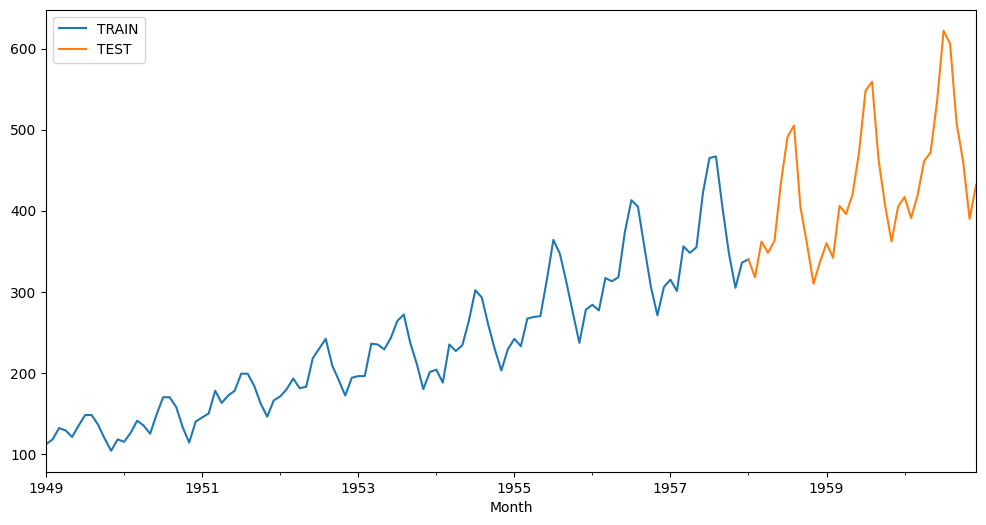

In [28]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,6))


<Axes: xlabel='Month'>

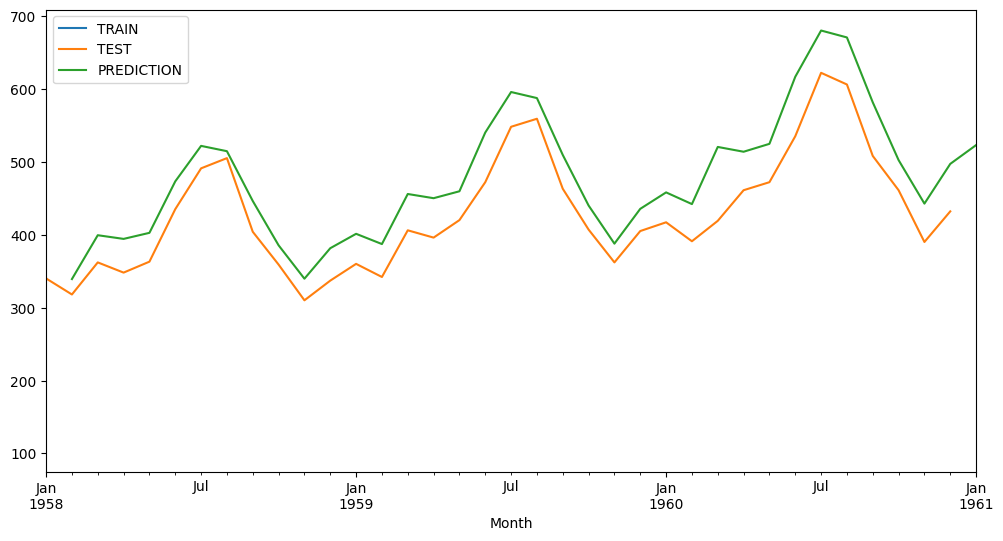

In [29]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01'])


# Evaluating the DATA through MAE,MSE,RMSE

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [31]:
mean_absolute_error(test_data,test_predictions)

63.03104082299123

In [37]:

mse = mean_squared_error(test_data,test_predictions)
mse

5614.236501157957

In [38]:
root_mean_squared_error = np.sqrt(mse)
root_mean_squared_error

74.92820898138402

In [40]:
final_model = ExponentialSmoothing(
    df['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
    ).fit()

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [41]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Month'>

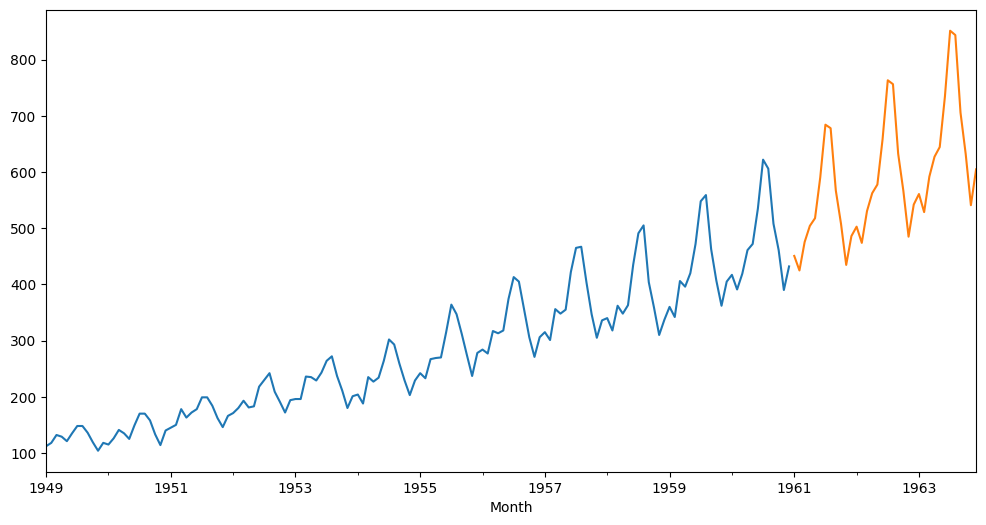

In [42]:
df['Thousands of Passengers'].plot(figsize=(12,6))
forecast_predictions.plot()

In [43]:
df2 = pd.read_csv('CSVs/samples.csv',index_col=0,parse_dates=True)

In [45]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

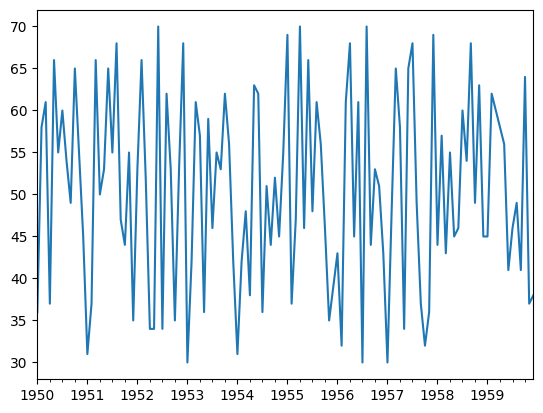

In [46]:
df2['a'].plot()

<Axes: >

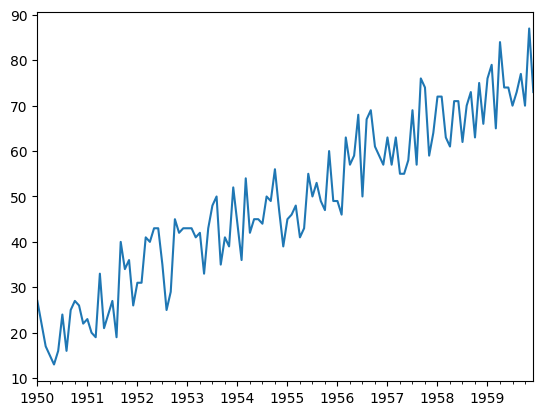

In [ ]:
df2['b'].plot()

This is a non stationary chart ,
to make it stationary...

In [49]:
from statsmodels.tsa.statespace.tools import diff

<Axes: >

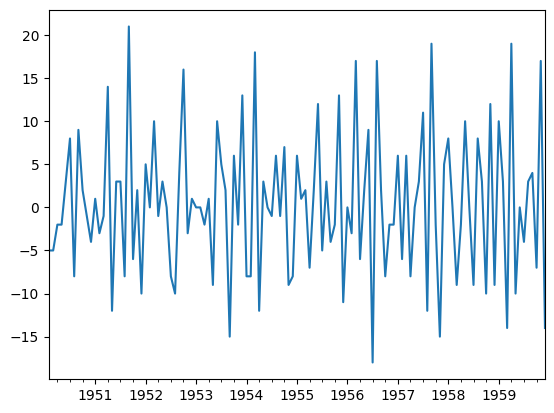

In [ ]:
diff(df2['b'],k_diff=1).plot()
## no more seasonality and trend





# ACF & PACF Plots




In [51]:
import statsmodels.api as sm 


In [52]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [53]:
#non stationary 
df1 = pd.read_csv('CSVs/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [54]:
#stationary dataset
df2 = pd.read_csv('CSVs/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [55]:
df = pd.DataFrame({'a' : [13,15,11,12,9]})

In [56]:
df

,a
0,13
1,15
2,11
3,12
4,9


In [57]:
acf(df['a'])

array([ 1.  ,  0.  ,  0.1 , -0.45, -0.15])

In [61]:
pacf_yw(df['a'],nlags = 4,method = 'adjusted')

array([ 1.        ,  0.        ,  0.16666667, -1.15714286,  1.70168573])

In [63]:
pacf_ols(df['a'],nlags = 2) # the lags are used for determining the order of AR terms in ARIMA models by showing direct correlations between observations at different time lags

array([1.        , 0.08571429, 0.78571429])

In [64]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

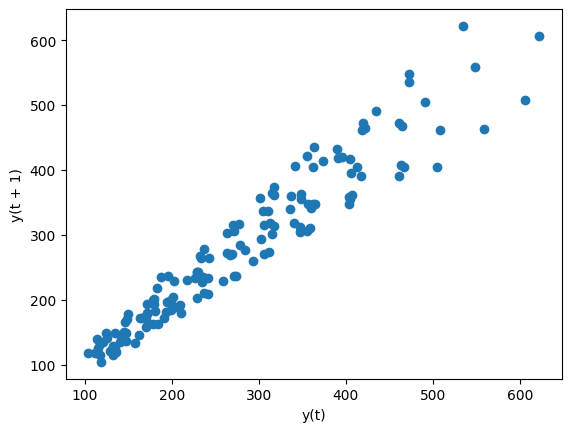

In [65]:
lag_plot(df1['Thousands of Passengers'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

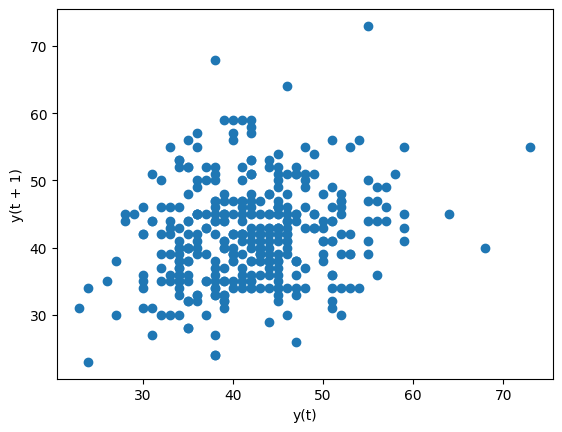

In [66]:
lag_plot(df2['Births'])

In [68]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

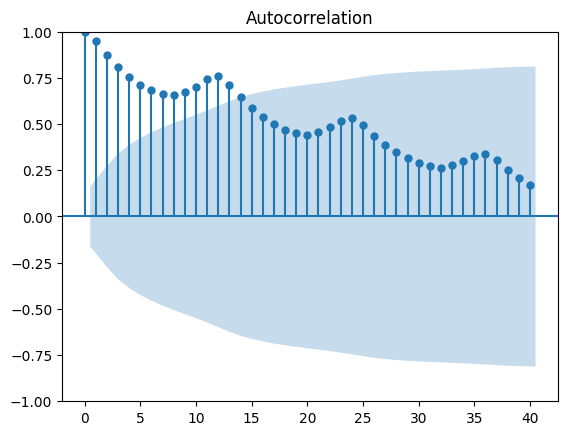

In [72]:
plot_acf(df1,lags = 40); # the shaded region is the confidence interval
# the points out of the confidence interval are the lags that are significant
# the points inside the confidence interval are the lags that are not significant


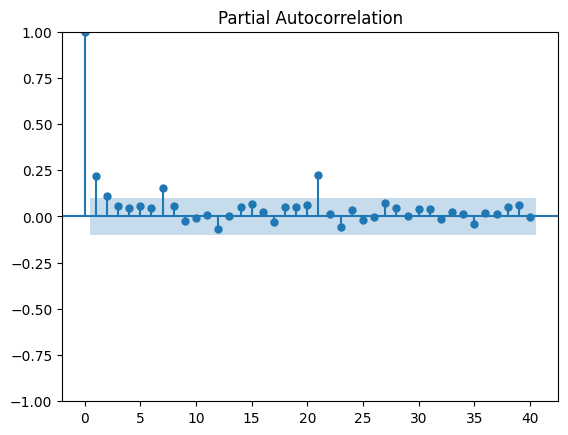

In [75]:
plot_pacf(df2,lags = 40,);

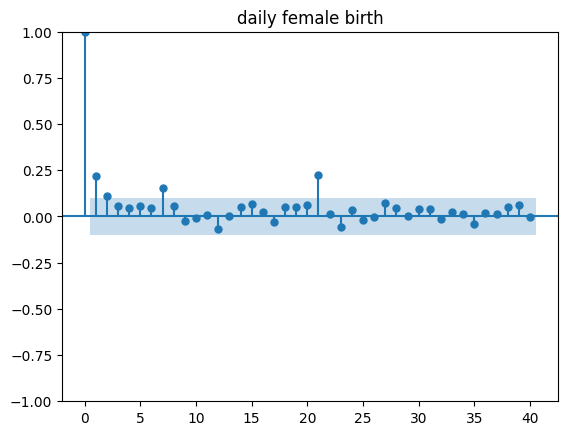

In [76]:
plot_pacf(df2,lags = 40,title = 'daily female birth');